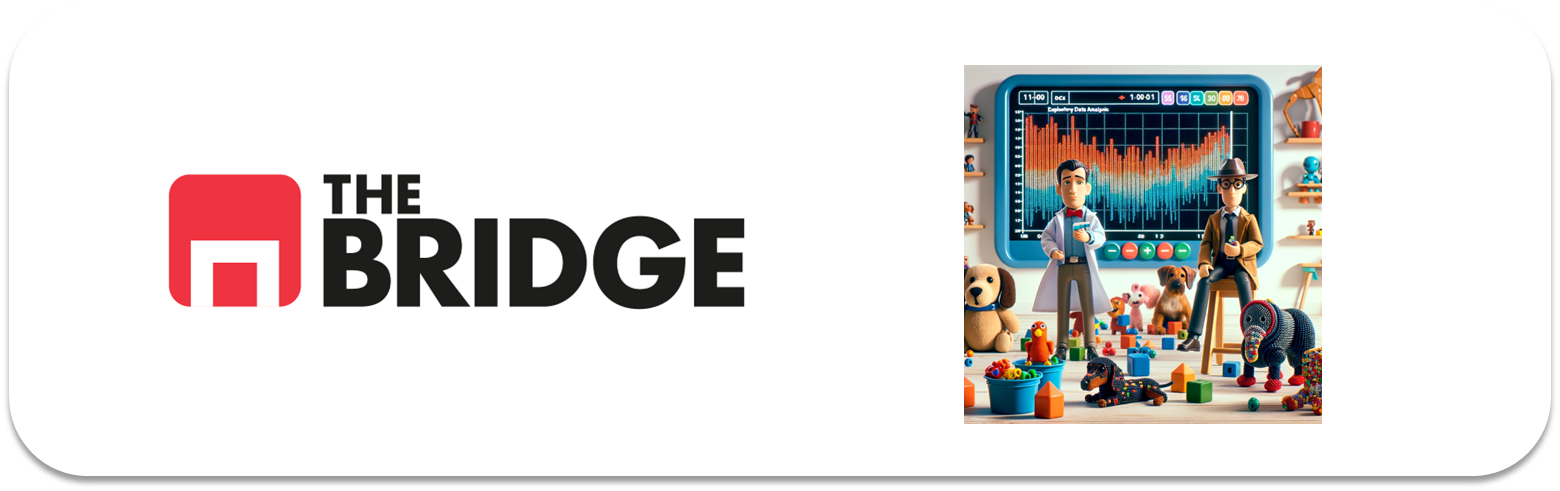

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *
pd.options.mode.copy_on_write = True

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [98]:
df = pd.read_csv("./data/titanic.csv")
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [99]:
df = df.drop(["deck", "survived", "pclass", "embarked"], axis=1)
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [100]:
df["family_members"] = df["parch"] + df["sibsp"]
df = df.drop(["parch", "sibsp"], axis=1)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [101]:
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
media = df["age"].mean()
std = df["age"].std()
n_nulos = df["age"].isnull().sum()

valores = np.random.normal(media, std, n_nulos).round().astype(int)
valores = np.clip(valores, 1, 80)

# Asignar valores a los nulos
df.loc[df["age"].isnull(), "age"] = valores

# df["age"] = df["age"].round().astype(int)


In [104]:
df["age"].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 32.  , 31.  , 33.  , 34.  , 15.  ,
       28.  ,  8.  , 44.  , 19.  , 40.  , 41.  , 60.  , 66.  , 42.  ,
        5.  , 21.  , 18.  ,  3.  , 71.  , 24.  ,  7.  , 49.  , 29.  ,
       65.  , 28.5 , 11.  , 45.  , 25.  , 17.  , 16.  , 62.  ,  1.  ,
        0.83, 30.  , 23.  , 46.  , 59.  , 12.  , 37.  , 47.  , 14.5 ,
       70.5 , 32.5 ,  9.  , 36.5 , 51.  , 55.5 , 40.5 , 48.  , 61.  ,
       56.  , 50.  , 36.  , 13.  , 45.5 , 20.5 , 53.  , 52.  , 63.  ,
       23.5 ,  0.92, 43.  , 67.  , 68.  , 10.  , 64.  ,  0.75,  6.  ,
       57.  , 80.  , 70.  , 24.5 ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ,
       76.  ])

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [12]:
def card_tipo(df, umbral_categoria = 10, umbral_continua = 25):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)
    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento
    return df_temp

card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
sex,2,0.224467,object,Binaria
age,265,29.741863,float64,Numerica continua
fare,248,27.833895,float64,Numerica continua
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria
embark_town,3,0.3367,object,Categorica
alive,2,0.224467,object,Binaria
alone,2,0.224467,bool,Binaria
family_members,9,1.010101,int64,Categorica


In [16]:
categoricas = [
    "sex",
    "class",
    "who",
    "embark_town",
    "adult_male",
    "alive",
    "alone",    
]

numericas = [
    "age",
    "fare",
    "family_members",
]

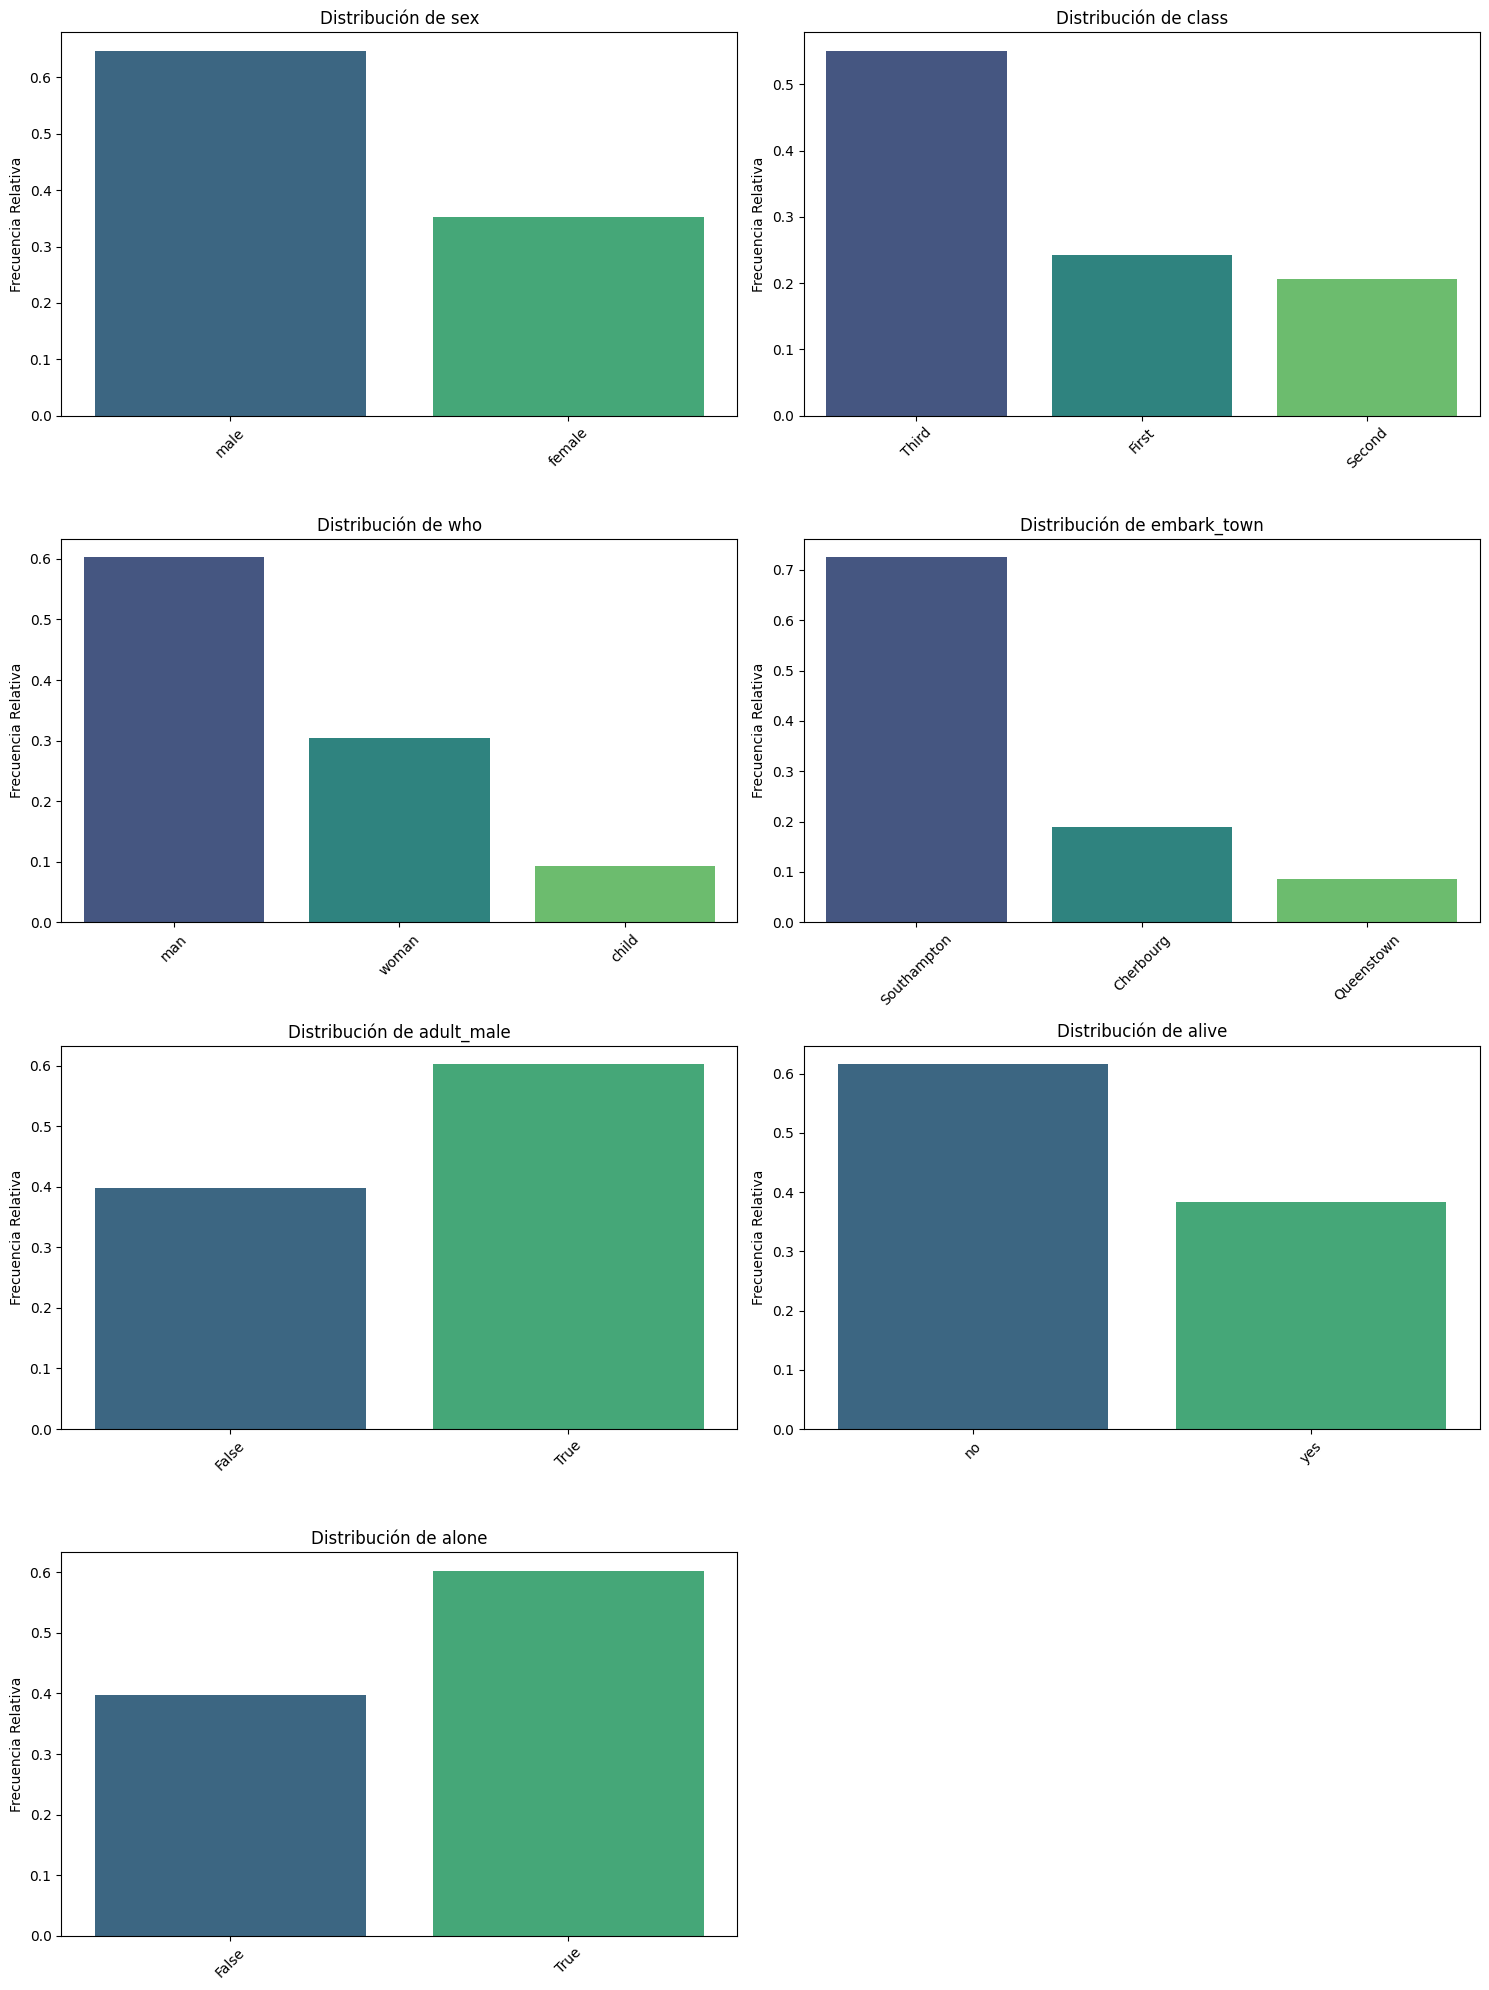

In [17]:
pinta_distribucion_categoricas(df, categoricas, relativa = True)

(3, 2)


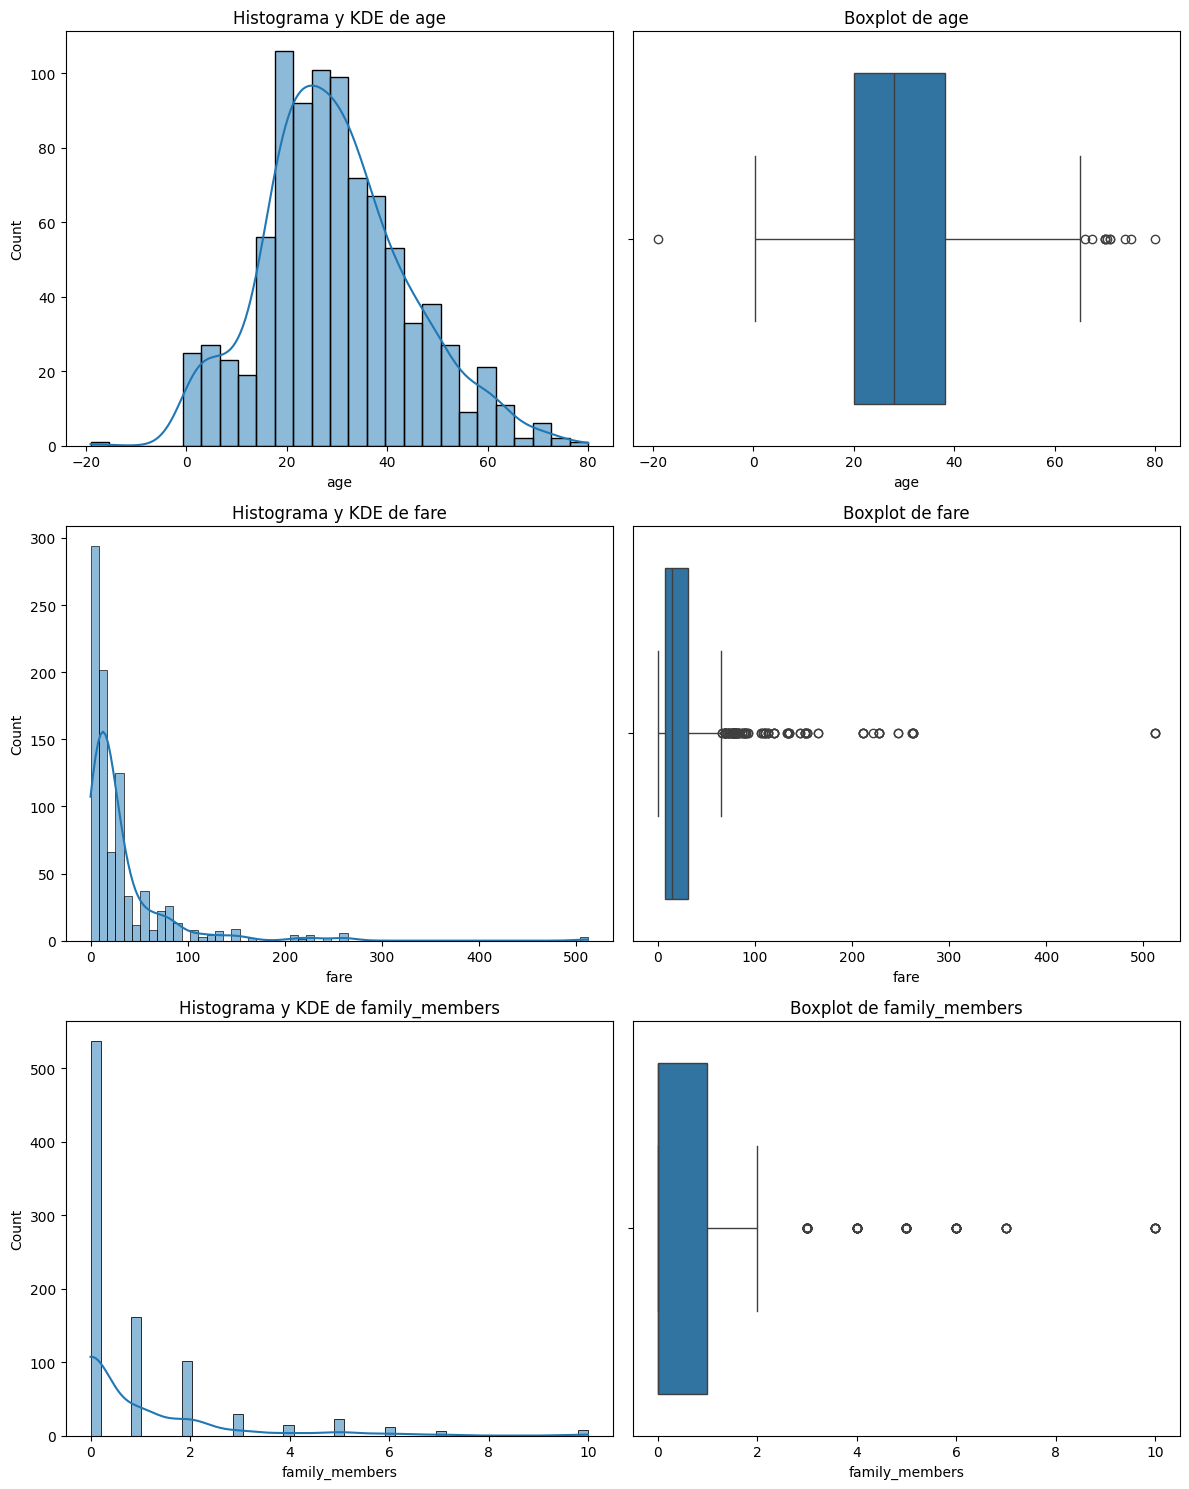

In [15]:
plot_combined_graphs(df, numericas, whisker_width=1.5)

**1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?**

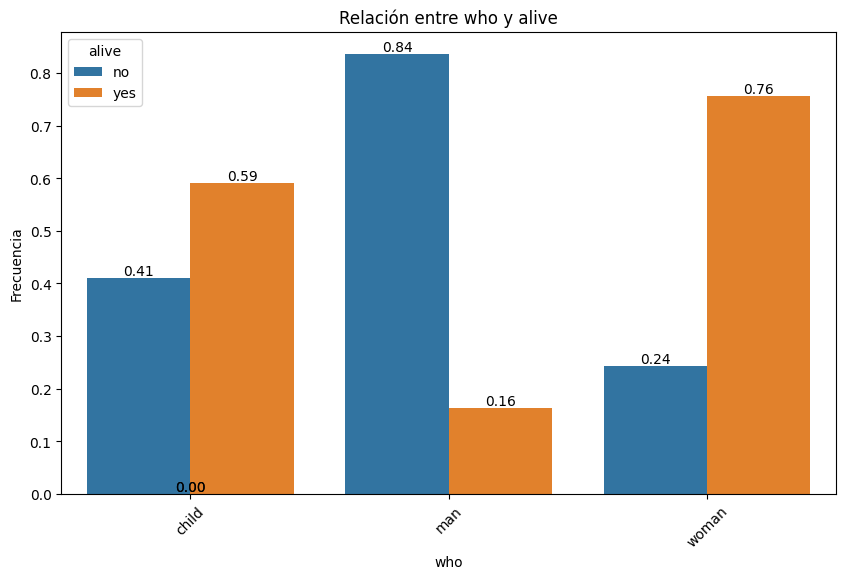

In [20]:
plot_categorical_relationship_fin(df, "who","alive", relative_freq = True, show_values = True)

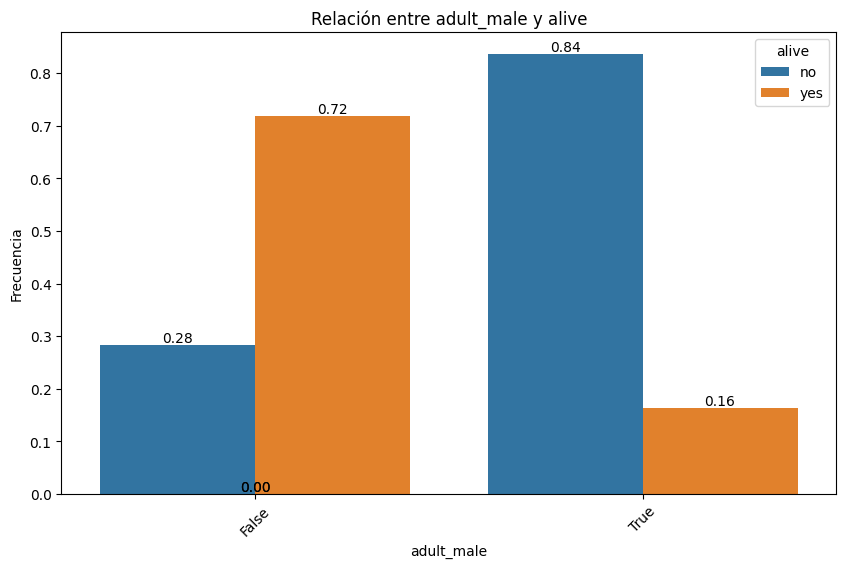

In [21]:
plot_categorical_relationship_fin(df, "adult_male","alive", relative_freq = True, show_values = True)

Cambia completamente la distribucion (60% fallecen, 40% viven).
- En el caso de los niños la distribucion se invierte (60% viven, 40% fallecen).
- En el caso de los hombres, se dispara la columna de los fallecidos (80% fallecen, 20% viven).
- En el caso de las mujeres, se dispara la columna de los vivos (76% viven, 24% fallecen).

**2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?**

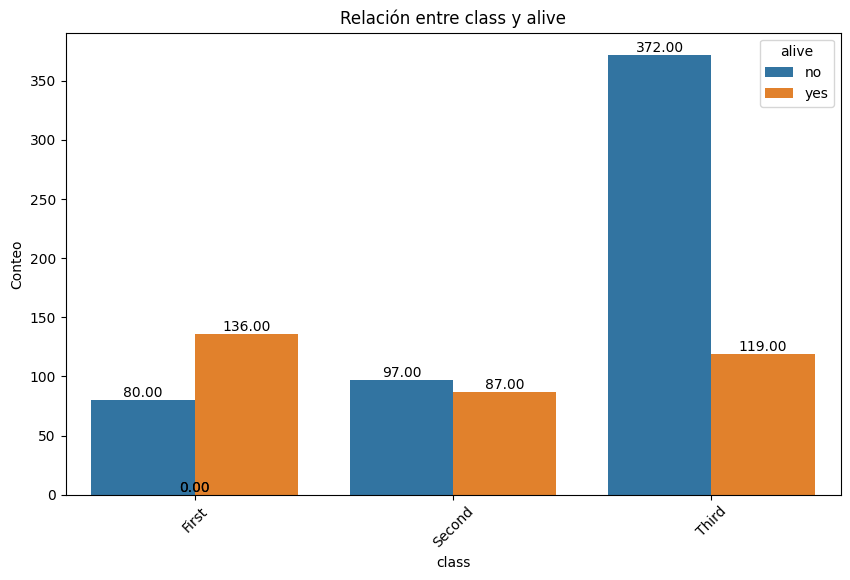

In [23]:
plot_categorical_relationship_fin(df, "class","alive", show_values = True)

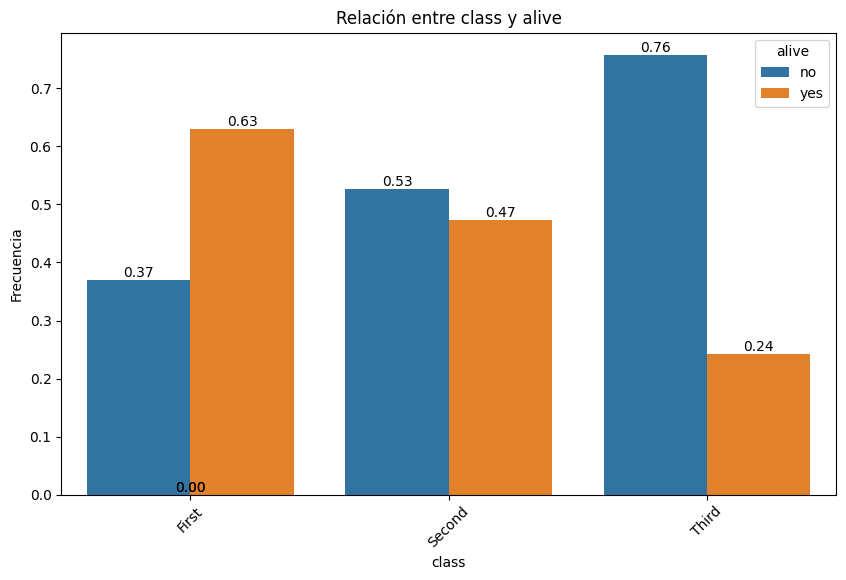

In [24]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq = True, show_values = True)

- Los que mas sobrevivieron fueron los de la primera clase. 
- El mayor número de fallecidos esta en la tercera clase. 
- En las segunda clase estan muy igualados

**3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?**

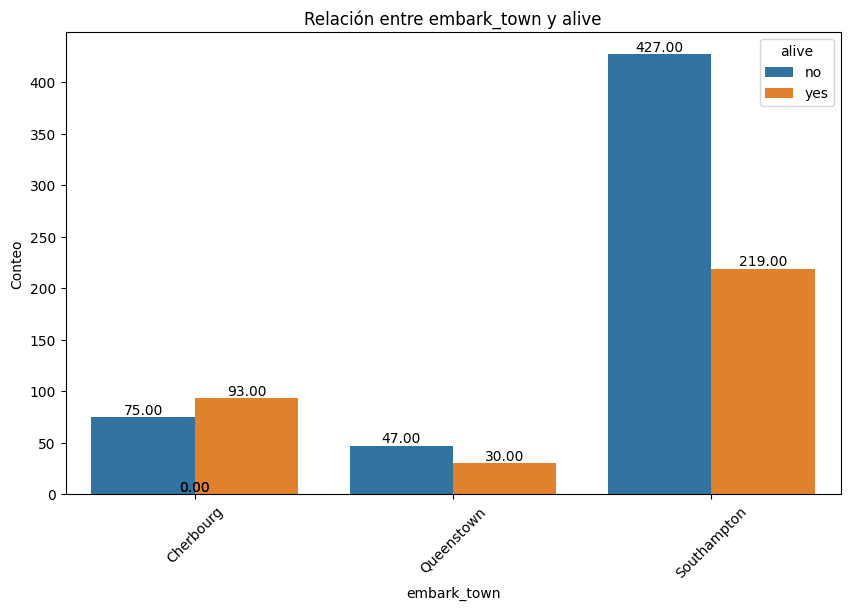

In [28]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values = True)

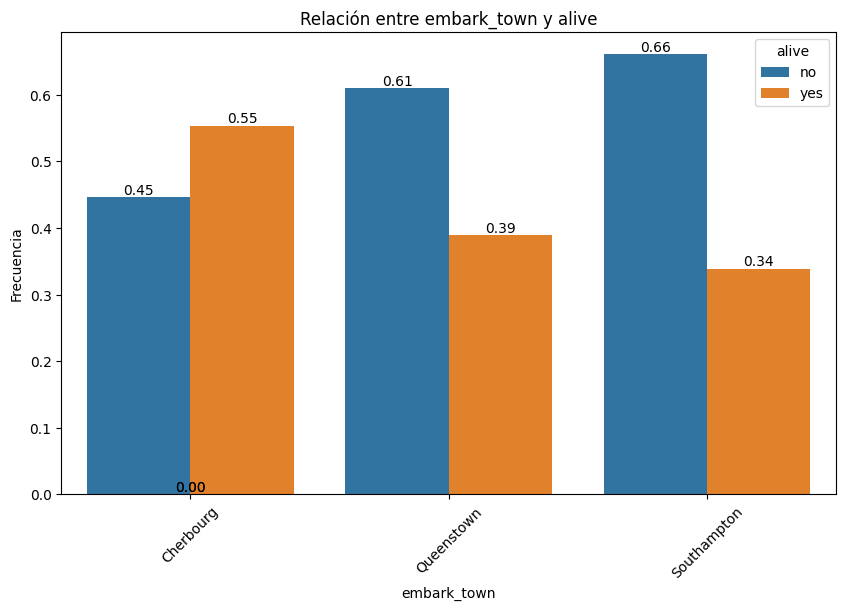

In [27]:
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq = True, show_values = True)

Hay una relacion entre donde embarcaron y si sobrevivieron o no. 
- En southampton y en Queenstown hay mas fallecidos
- En Cherbourg hay mas que sobrevivieron. 
- ¿Habrá una relacion entre donde embarcaron y la clase? 

**4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?**

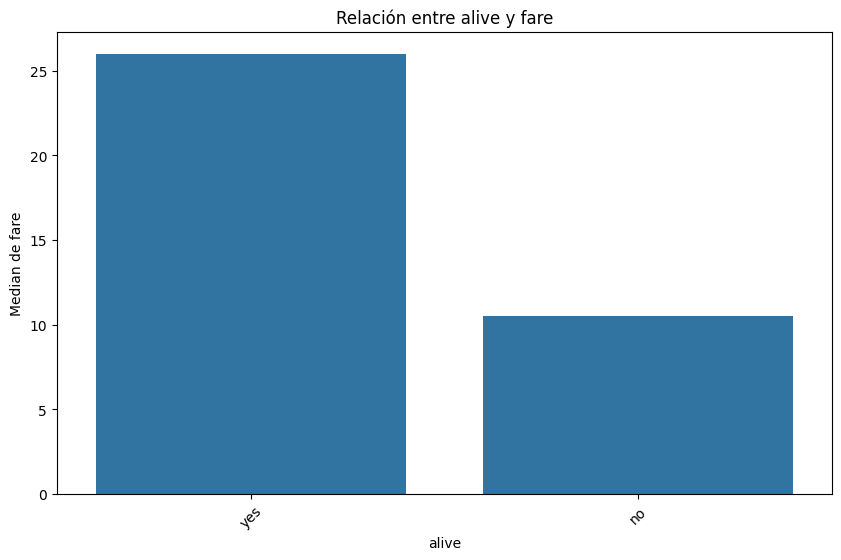

In [31]:
plot_categorical_numerical_relationship(df,"alive","fare", measure = "median")

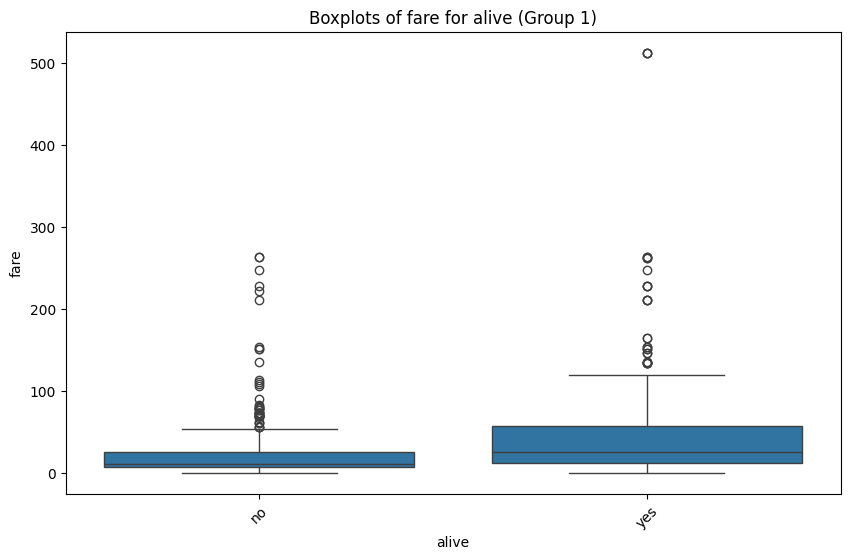

In [32]:
plot_grouped_boxplots(df,"alive","fare")

- La relación esta en que cuanto mas pagan, mas probabilidad de sobrevivir.
- Tambien estará relacionado con clase.

**5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?**

In [35]:
# Trabajadores del barco. 

df.loc[df["fare"].idxmax(), "alive"]
# Sobrevivio

'yes'

**6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.**

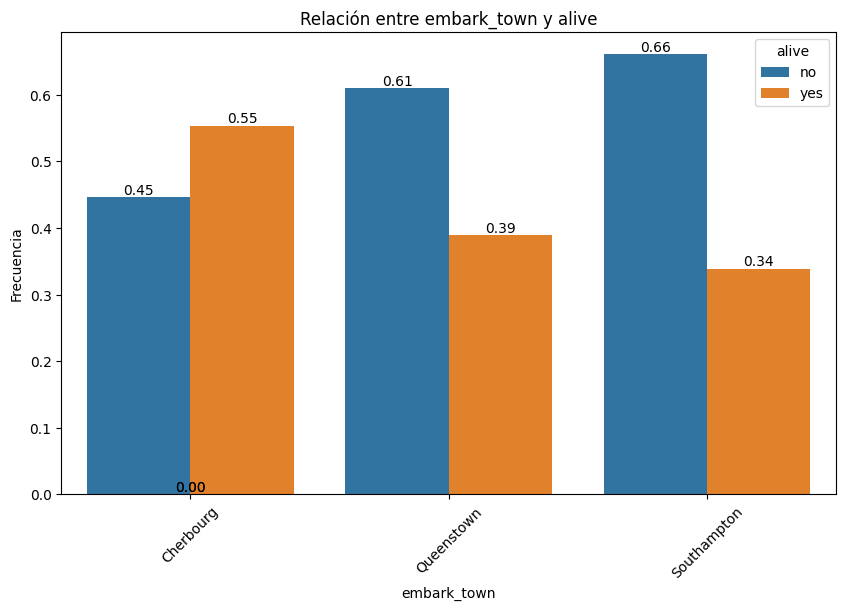

In [36]:
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq = True, show_values = True)

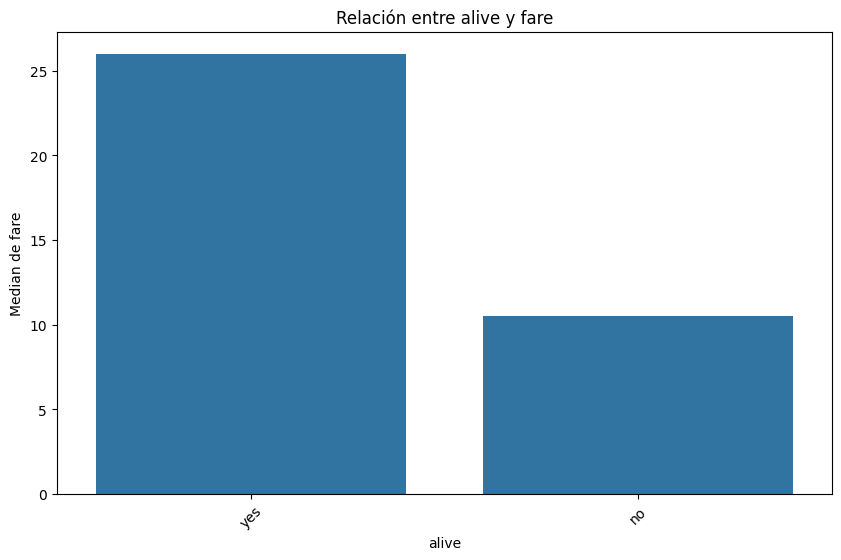

In [38]:
plot_categorical_numerical_relationship(df,"alive","fare", measure = "median")

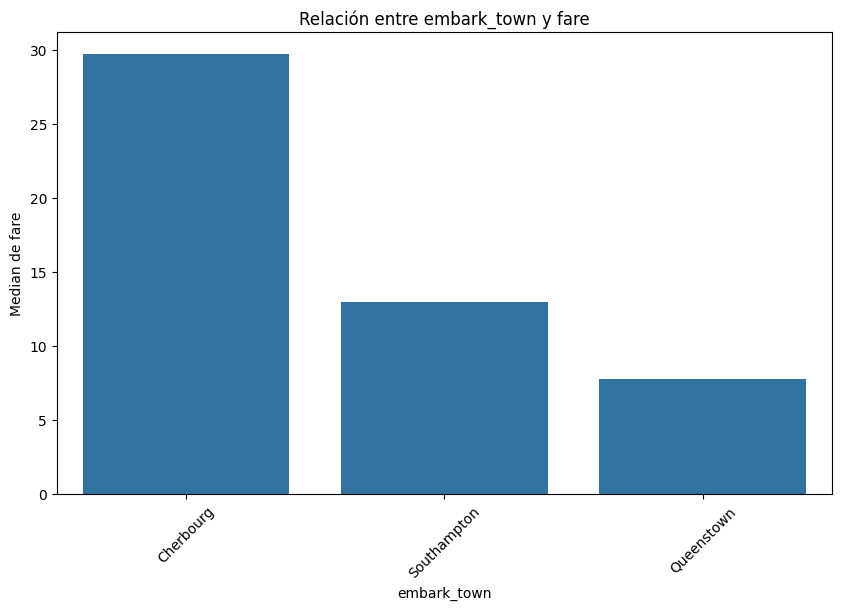

In [39]:
plot_categorical_numerical_relationship(df,"embark_town","fare", measure = "median")

In [50]:
col_directora = "alive"
col_1 = "fare"
col_2 = "embark_town"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

In [ ]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

**7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?**

In [107]:
columnas = ["alive","class","age"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta no:


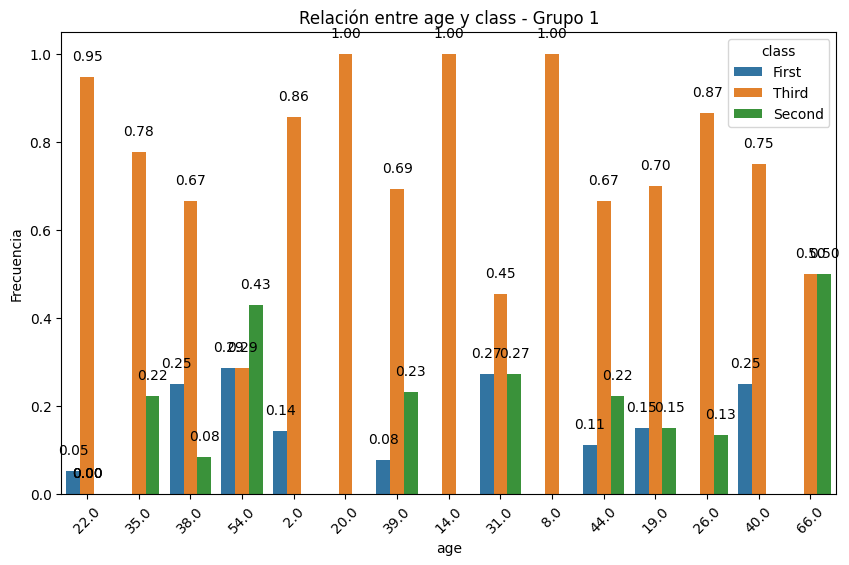

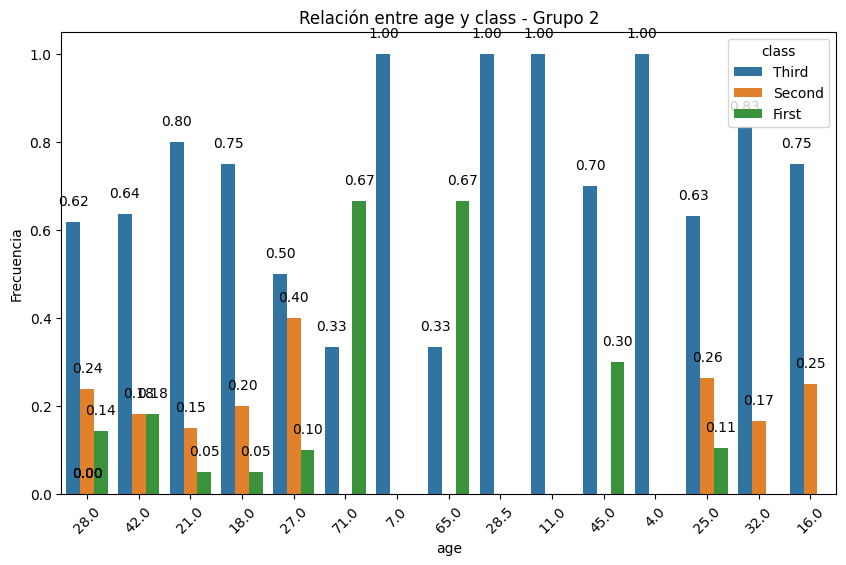

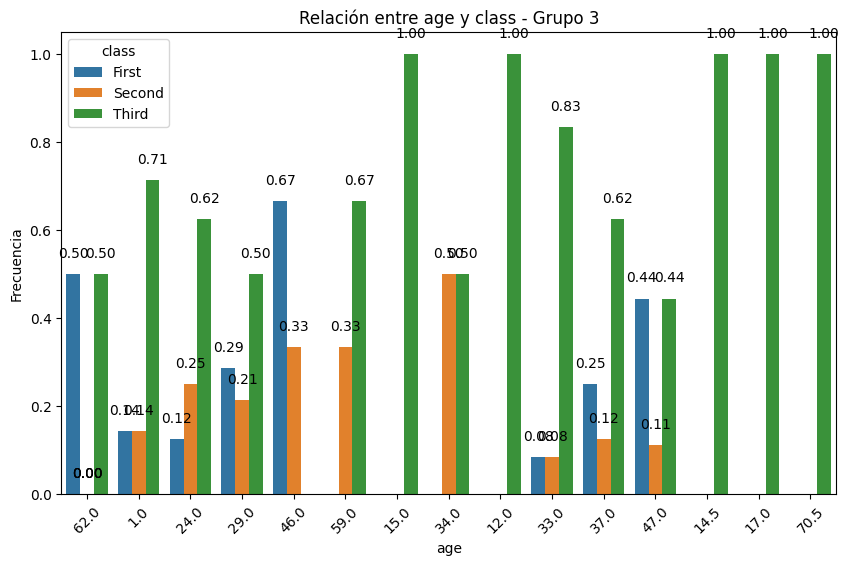

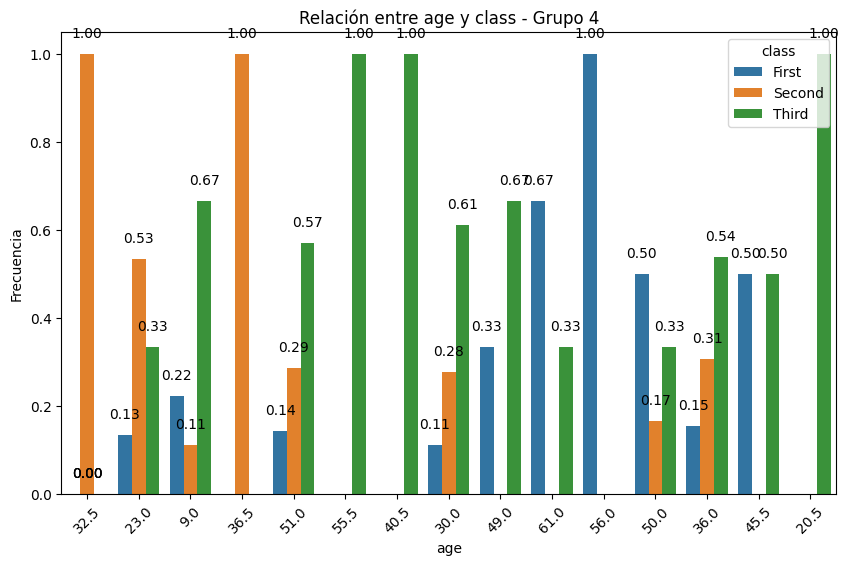

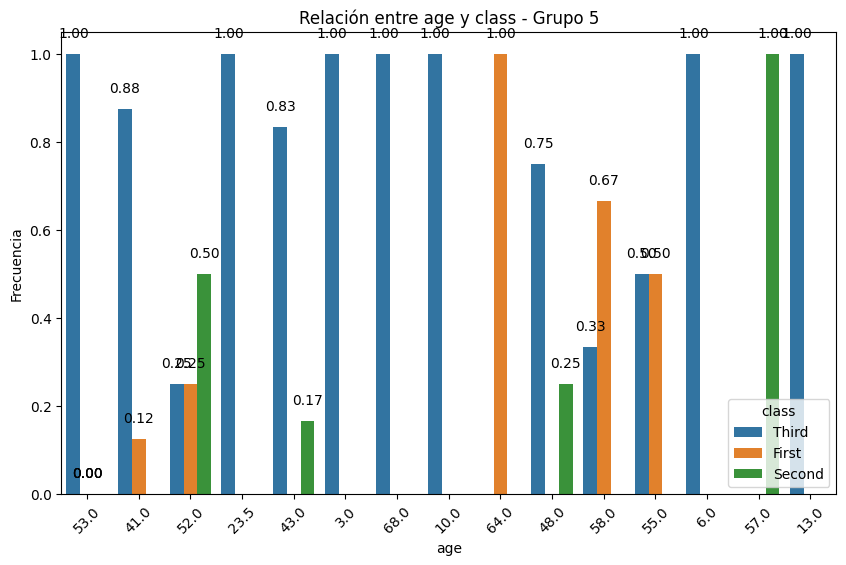

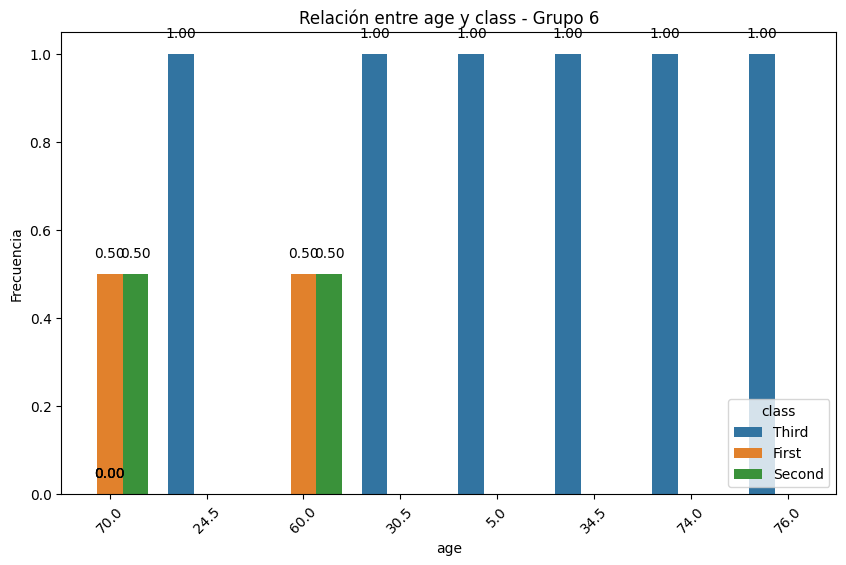

Respuesta yes:


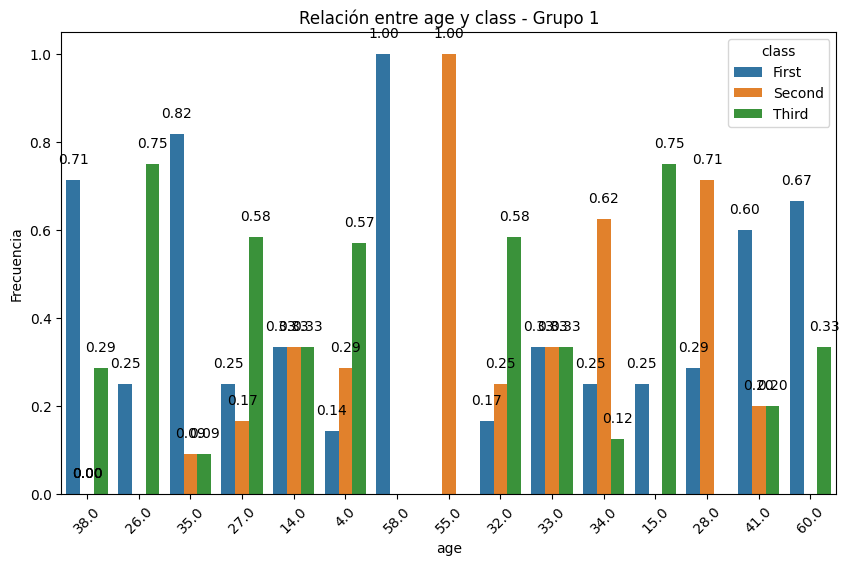

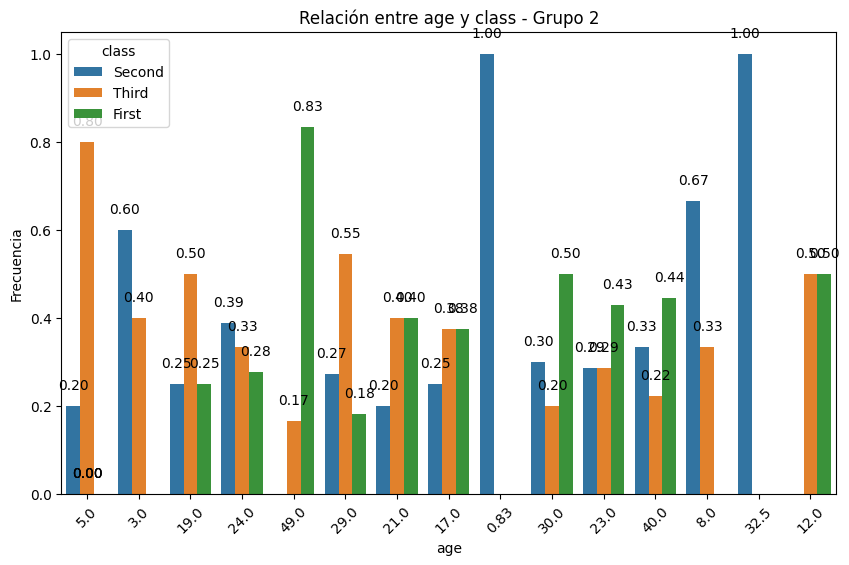

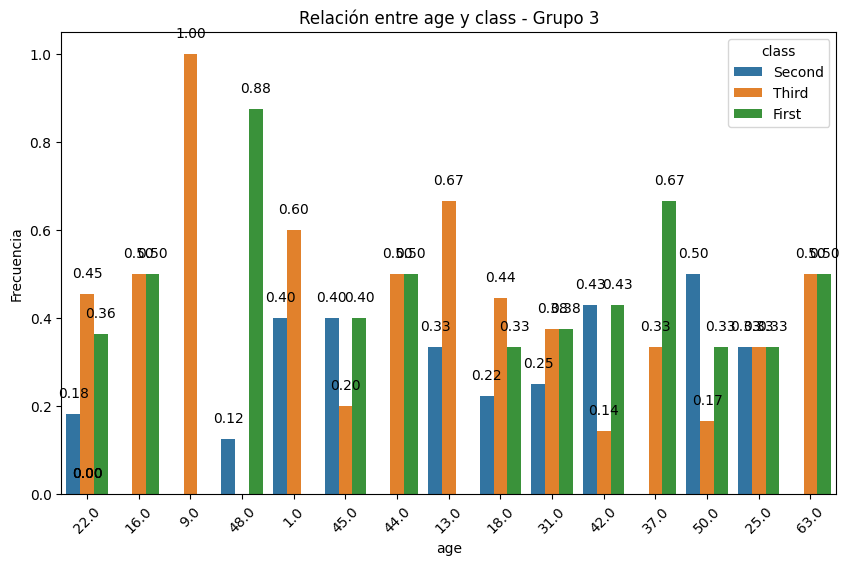

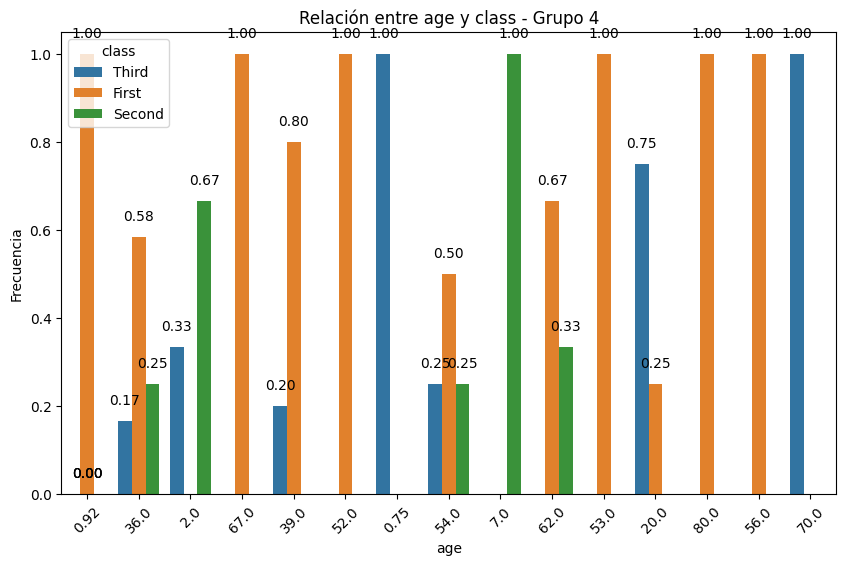

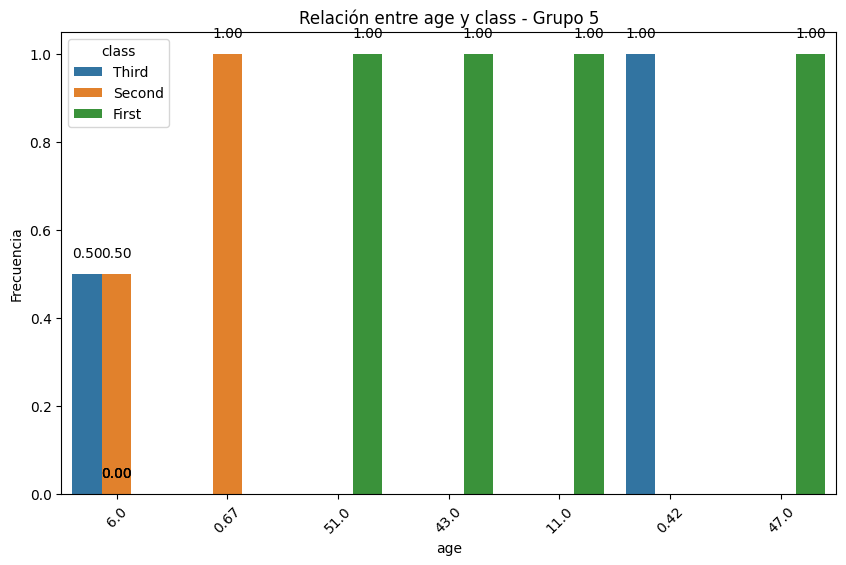

In [108]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=15)

**8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?**

In [105]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta no:


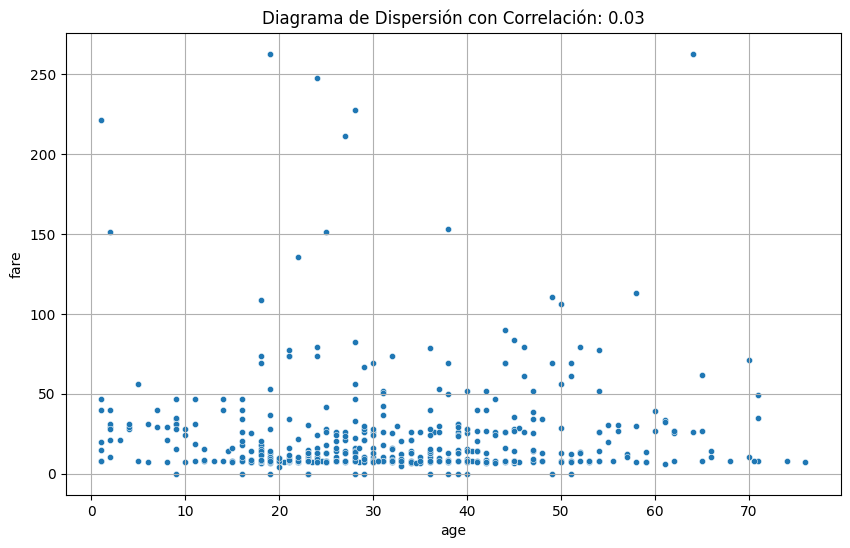

Respuesta yes:


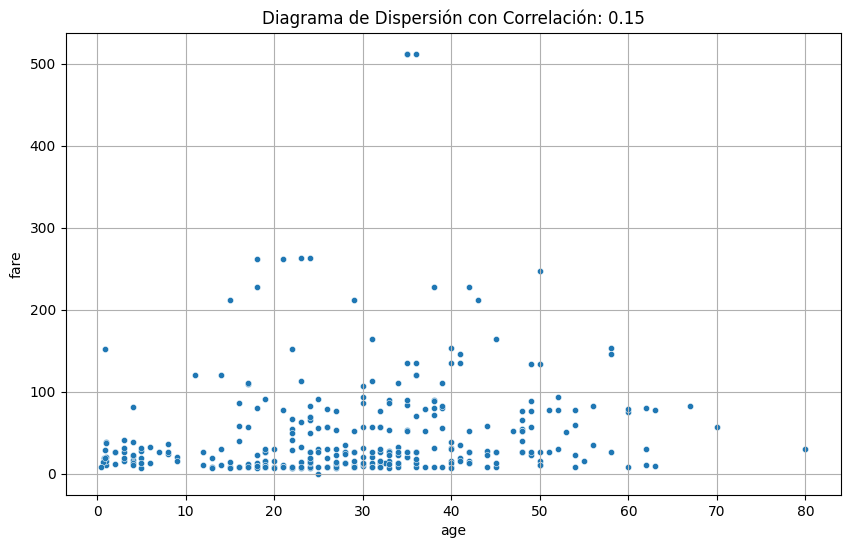

In [106]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?